## Data Processing

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data set
energy_data = pd.read_csv('energey_efficiency_data.csv')

In [3]:
# view data set
energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
# drop extraneous columns and rename columns
energy_data = energy_data.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1)
energy_data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', \
                       'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', \
                       'Heating_Load', 'Cooling_Load']

In [5]:
# delete rows with missing data
energy_data = energy_data.dropna()

In [6]:
# view updated data set
energy_data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [7]:
# break data into independent and dependent variables
X = energy_data.iloc[:, :-2].values
y = energy_data.iloc[:, -2:].values

In [8]:
# split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Visialize Dependent Data

[]

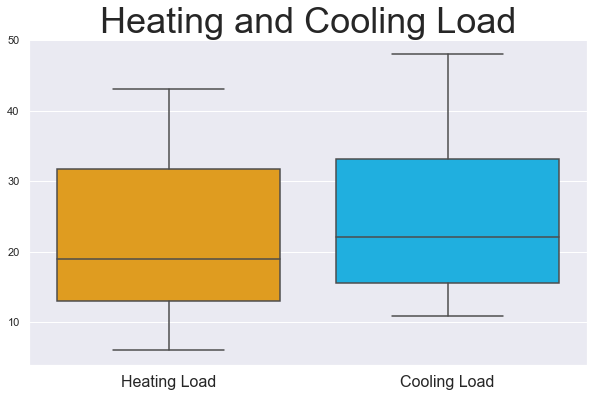

In [10]:
# boxplot of dependent variables
sns.set(rc={'figure.figsize':(10,6)})
ybox = sns.boxplot(data=y, showfliers=False, palette= ['orange','deepskyblue'])

ybox.set_title('Heating and Cooling Load', fontsize=36)
ybox.set_xticklabels(['Heating Load','Cooling Load'], size=16)

plt.plot()

## Linear Regression 

In [51]:
# train the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# find r^2 value
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_linereg = r2_score(y_test, y_pred)
print(r2_linereg)

0.891408726790584


In [53]:
# predict the value of one data point who's actual values are [28.69, 29.53]
regressor.predict([[0.98,514.50,294,110.25,7,2,0.25,5]])

array([[28.51175635, 29.6593452 ]])

## Random Forrest

In [62]:
# train the random forest model for y1, heating load
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
# find r^2 value
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_forest = r2_score(y_test, y_pred)
print(r2_forest)

0.9779480253888186


In [64]:
# predict the value of one data point who's actual values are [28.69, 29.53]
regressor.predict([[0.98,514.50,294,110.25,7,2,0.25,5]])

array([[28.7187, 29.5034]])